In [13]:
import os
# os.environ['DEVICE_ID'] = '0'
import numpy as np
import mindspore as ms
from mindspore import nn
from mindspore import context
context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

#生成模拟数据并加入扰动
x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x + 0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)
xi=np.squeeze(x)
yi=np.squeeze(y)

In [30]:
#最小二乘法
import scipy as sp
from scipy.optimize import leastsq
p0=[1,0]
def func(p,x):
    w,b = p
    return w*x+b

def Ewb(p,x,y):
    return y-func(p,x)

model=leastsq(Ewb, p0, args=(xi, yi))   # 三个参数：误差函数、函数参数列表、数据点
w=model[0][0]
b=model[1]
w,b

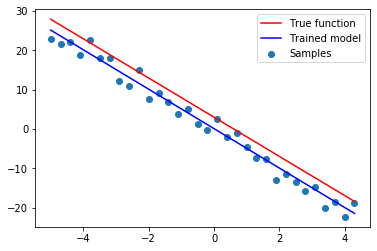

In [31]:
#绘图
from matplotlib import pyplot as plt
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x + b, c='r', label='True function')
plt.plot(x, -5 * x + 0.1, c='b', label='Trained model')
plt.legend()

In [2]:
#原方法
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 19, loss is 3.384748


In [3]:
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))
for i in range(-10, 11, 5):
    print('x = {0}, predicted y= {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.8951735496521 * x + 0.22393111884593964
x = -10, predicted y= [[49.175667]]
x = -5, predicted y= [[24.699799]]
x = 0, predicted y= [[0.22393112]]
x = 5, predicted y= [[-24.251938]]
x = 10, predicted y= [[-48.727806]]


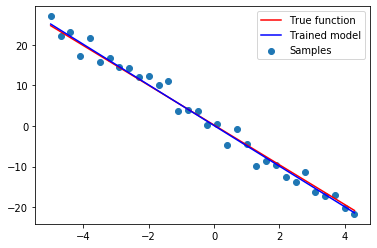

In [4]:
from matplotlib import pyplot as plt
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x + b, c='r', label='True function')
plt.plot(x, -5 * x + 0.1, c='b', label='Trained model')
plt.legend()